In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import TensorBoard

import matplotlib.pyplot as plt
import seaborn as sns

#### Distribution of the data

Distribution in train set, test set and validation set

In [2]:
# Load dataset
df = pd.read_csv('crop_yield_data.csv')
df

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554
...,...,...,...,...,...,...
2995,1483,9,78,12,2739,155
2996,804,9,481,4,1898,319
2997,870,1,113,7,2282,129
2998,1352,6,767,11,2901,493


In [3]:
df.columns

Index(['rainfall_mm', 'soil_quality_index', 'farm_size_hectares',
       'sunlight_hours', 'fertilizer_kg', 'crop_yield'],
      dtype='object')

In [153]:
# Preprocess the data in X and y for his use
X = df.drop('crop_yield', axis=1).values

df['target'] = pd.cut(df['crop_yield'], bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = df['target'].values
print(f'Shapes:\n- X:{X.shape}\n- y:{y.shape}')

Shapes:
- X:(3000, 5)
- y:(3000,)


In [154]:
# Code column soil quality index
labelEncoder = LabelEncoder()
X[:, 1] = labelEncoder.fit_transform(X[:, 1])
columnTransformer1 = ColumnTransformer(transformers=[("onehot", OneHotEncoder(), [1])], 
                                      remainder="passthrough")
X[:, 3] = labelEncoder.fit_transform(X[:, 3])
columnTransformer3 = ColumnTransformer(transformers=[("onehot", OneHotEncoder(), [3])], 
                                      remainder="passthrough")
X

array([[1626,    8,  636,    7, 1006],
       [1959,    8,   73,    7,  112],
       [1360,    0,  352,    1,  702],
       ...,
       [ 870,    0,  113,    3, 2282],
       [1352,    5,  767,    7, 2901],
       [ 883,    6,  170,    7,  485]])

In [155]:
# Train set, test set and validation set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.1,
                                                  random_state=0)
print(f'Shapes:\n- Train: {X_train.shape, y_train.shape}\n- Test: {X_test.shape, y_test.shape}\n- Validation: {X_val.shape, y_val.shape}')

Shapes:
- Train: ((2160, 5), (2160,))
- Test: ((600, 5), (600,))
- Validation: ((240, 5), (240,))


In [156]:
# Scale data
standardizer = StandardScaler()
X_train = standardizer.fit_transform(X_train)
X_test = standardizer.fit_transform(X_test)
X_val = standardizer.fit_transform(X_val)

### Model thought ANN

Build structure , compilation and fit of the model

In [157]:
# Build structure
from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(5, )),
    Dense(units=10, activation='relu', kernel_initializer='uniform', kernel_regularizer=l2(0.01)),
    Dense(units=20, activation='relu', kernel_initializer='uniform', kernel_regularizer=l2(0.01)),
    Dense(units=10, activation='relu', kernel_initializer='uniform', kernel_regularizer=l2(0.01)),
    Dense(units=10, activation='softmax', kernel_initializer='uniform')
])



In [158]:
# Tensorboard creation
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

In [159]:
# Compilation model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy' ])

In [160]:
# Fit model
model.fit(X_train, y_train,batch_size=32, epochs=1000, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])
# tensorboard --logdir=./logs/fit


Epoch 1/1000
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1315 - loss: 2.3014 - val_accuracy: 0.1317 - val_loss: 2.2901
Epoch 2/1000
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1315 - loss: 2.2867 - val_accuracy: 0.1317 - val_loss: 2.2686
Epoch 3/1000
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1345 - loss: 2.2642 - val_accuracy: 0.1317 - val_loss: 2.2444
Epoch 4/1000
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1466 - loss: 2.2507 - val_accuracy: 0.1317 - val_loss: 2.2364
Epoch 5/1000
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1342 - loss: 2.2489 - val_accuracy: 0.1317 - val_loss: 2.2319
Epoch 6/1000
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1417 - loss: 2.2436 - val_accuracy: 0.1317 - val_loss: 2.2298
Epoch 7/1000
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1535 - loss: 2.2286 - val_accuracy: 0.1317 - val_loss: 2.2280
Epoch 8/1000
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1541 - loss: 2.2333 - val_accuracy: 0.

### Metrics

In [169]:
# Prediction about X_test
y_pred = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [170]:
# Correlation max about class
y_pred_classes = np.argmax(y_pred, axis=1) 

In [185]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


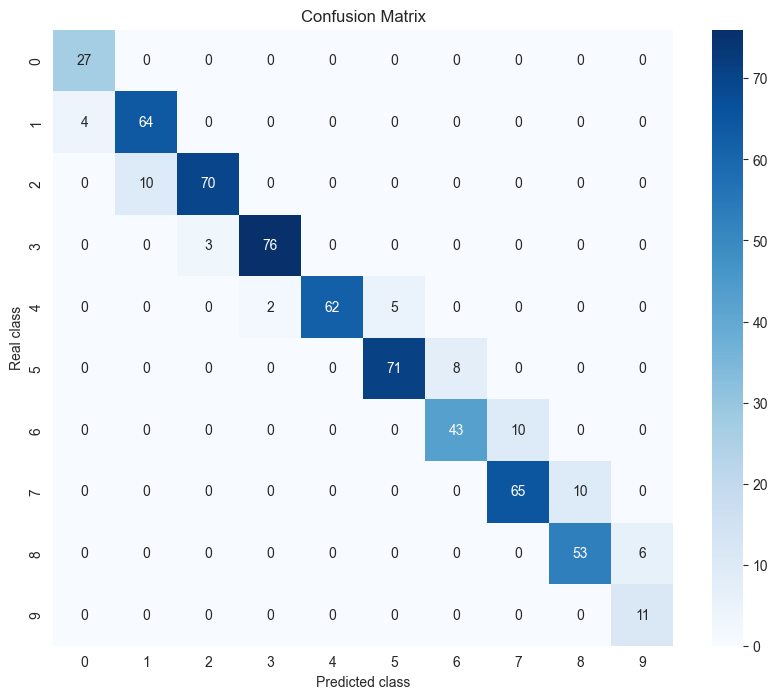

In [172]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted class')
plt.ylabel('Real class')
plt.title('Confusion Matrix')
plt.show()

### Predicition about X_val

In [189]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1) 
accuracy = accuracy_score(y_val, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.38


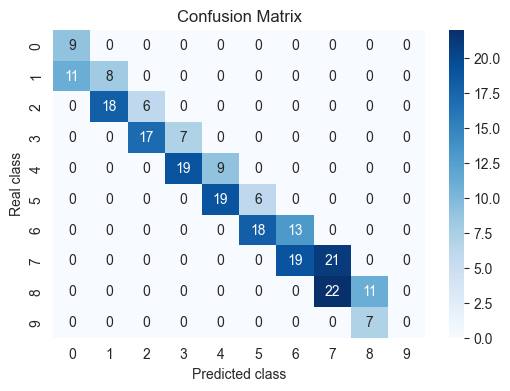

In [191]:
cm = confusion_matrix(y_val, y_pred_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted class')
plt.ylabel('Real class')
plt.title('Confusion Matrix')
plt.show()